# Setup

In [2]:
%pip install matplotlib opencv-python


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Otsu’s Algorithm with Gaussian Noise

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


### 1. Create synthetic image

In [4]:
img = np.zeros((200, 200), dtype=np.uint8)
cv2.rectangle(img, (30, 30), (80, 80), 85, -1)
cv2.rectangle(img, (120, 120), (170, 170), 170, -1)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### 2. Add Gaussian noise


In [5]:
mean = 0
sigma = 25
gauss = np.random.normal(mean, sigma, img.shape).astype(np.int16)
noisy_img = np.clip(img.astype(np.int16) + gauss, 0, 255).astype(np.uint8)


### 3. Apply Otsu's thresholding

In [6]:
_, otsu_thresh = cv2.threshold(noisy_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


### 4. Plot results

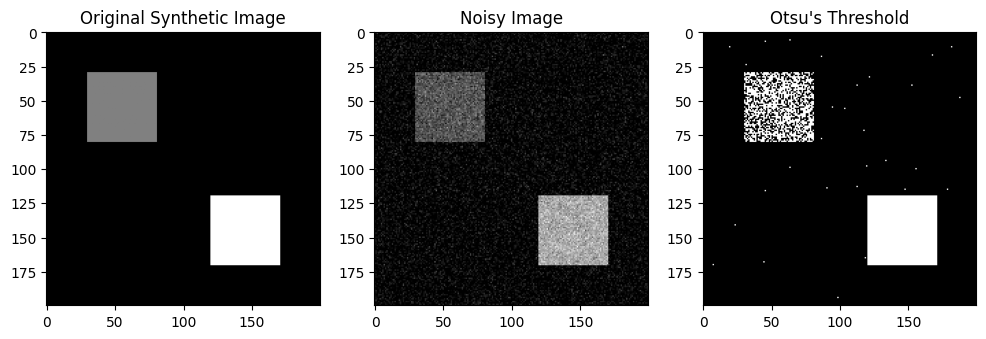

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original Synthetic Image")
plt.imshow(img, cmap="gray")

plt.subplot(1, 3, 2)
plt.title("Noisy Image")
plt.imshow(noisy_img, cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Otsu's Threshold")
plt.imshow(otsu_thresh, cmap="gray")
plt.show()


# Region Growing Segmentation

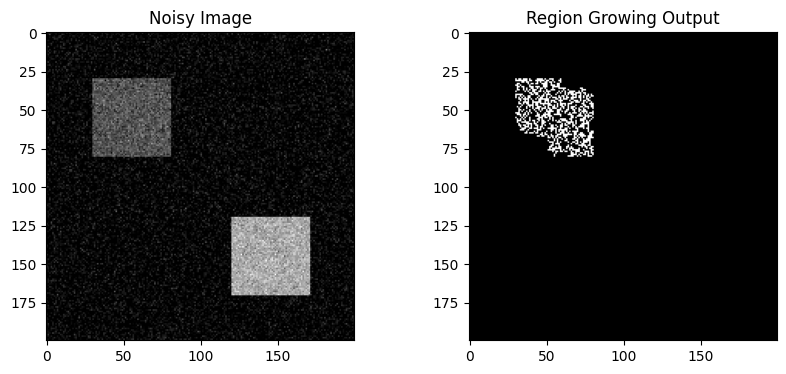

In [ ]:
def region_grow(img, seed, threshold=20):
    h, w = img.shape
    visited = np.zeros((h, w), np.uint8)
    output = np.zeros_like(img)
    seed_val = img[seed]
    queue = [seed]

    while queue:
        x, y = queue.pop(0)
        if visited[x, y] == 1:
            continue
        visited[x, y] = 1

        if abs(int(img[x, y]) - int(seed_val)) <= threshold:
            output[x, y] = 255
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < h and 0 <= ny < w and visited[nx, ny] == 0:
                        queue.append((nx, ny))
    return output

seed_point = (35, 35)  
seg_result = region_grow(noisy_img, seed_point, threshold=30)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Noisy Image")
plt.imshow(noisy_img, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Region Growing Output")
plt.imshow(seg_result, cmap="gray")
plt.show()
